In [ ]:
ç# 1. Connexion au Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Installation de l'outil pour lire les RAR
!apt-get install unrar

# 3. Installation de YOLO
!pip install ultralytics

!pip install splitfolders

# 4. Extraction du fichier RAR
import os

# Création du dossier de destination
extract_path = '/content/dataset'
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Commande magique pour décompresser un RAR
# Le "x" signifie eXtract
!unrar x "/content/drive/MyDrive/dataset_yolo.rar" "/content/dataset"

print("Dataset extrait avec succès !")

Streaming output truncated to the last 5000 lines.
Extracting  /content/dataset/dataset_yolo/images/FILE_044_17.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_19.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_2.jpg           18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_20.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_21.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_22.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_23.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_24.jpg          18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_3.jpg           18%  OK 
Extracting  /content/dataset/dataset_yolo/images/FILE_044_4.jpg           18%  OK 
Extracting  /content/dataset/

In [ ]:
import os
import shutil
import random
from glob import glob

# 1. Configuration des chemins
# Attention : vérifie si tes images sont dans 'dataset/images' ou 'dataset/dataset_yolo/images'
# Le script va chercher automatiquement.
base_input = '/content/dataset'
if os.path.exists(os.path.join(base_input, 'dataset_yolo')):
    base_input = os.path.join(base_input, 'dataset_yolo')

source_images = os.path.join(base_input, 'images')
source_labels = os.path.join(base_input, 'labels')

output_base = '/content/dataset_split'
dirs_to_create = [
    'images/train', 'images/val',
    'labels/train', 'labels/val'
]

# 2. Création de la structure
for d in dirs_to_create:
    os.makedirs(os.path.join(output_base, d), exist_ok=True)

# 3. Liste des images
# On récupère tous les jpg, png, etc.
image_files = glob(os.path.join(source_images, '*.*'))
random.shuffle(image_files) # Mélange aléatoire

split_idx = int(len(image_files) * 0.8) # 80% train
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

print(f"Total images: {len(image_files)}")
print(f"Train: {len(train_files)} | Val: {len(val_files)}")

# 4. Fonction de déplacement
def copy_data(file_list, split_type):
    for img_path in file_list:
        filename = os.path.basename(img_path)
        label_name = os.path.splitext(filename)[0] + '.txt'

        label_src = os.path.join(source_labels, label_name)

        # Destination
        img_dst = os.path.join(output_base, 'images', split_type, filename)
        label_dst = os.path.join(output_base, 'labels', split_type, label_name)

        # Copie Image
        shutil.copy(img_path, img_dst)

        # Copie Label (seulement s'il existe)
        if os.path.exists(label_src):
            shutil.copy(label_src, label_dst)

# 5. Exécution
copy_data(train_files, 'train')
copy_data(val_files, 'val')

print("Structure YOLO créée avec succès dans /content/dataset_split !")

Total images: 2726
Train: 2180 | Val: 546
Structure YOLO créée avec succès dans /content/dataset_split !


In [ ]:
import yaml

data_yaml = {
    'path': '/content/dataset_split',
    'train': 'images/train',
    'val': 'images/val',
    'nc': 1,           # Nombre de classes (Juste Hyperbole)
    'names': ['hyperbole']
}

with open('/content/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("Fichier de config créé !")

Fichier de config créé !


In [ ]:
from ultralytics import YOLO

# Chargement d'un modèle pré-entraîné (nano version : rapide et léger)
model = YOLO('yolov8n.pt')

# Entraînement
results = model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='gpr_hyperbole_model'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj

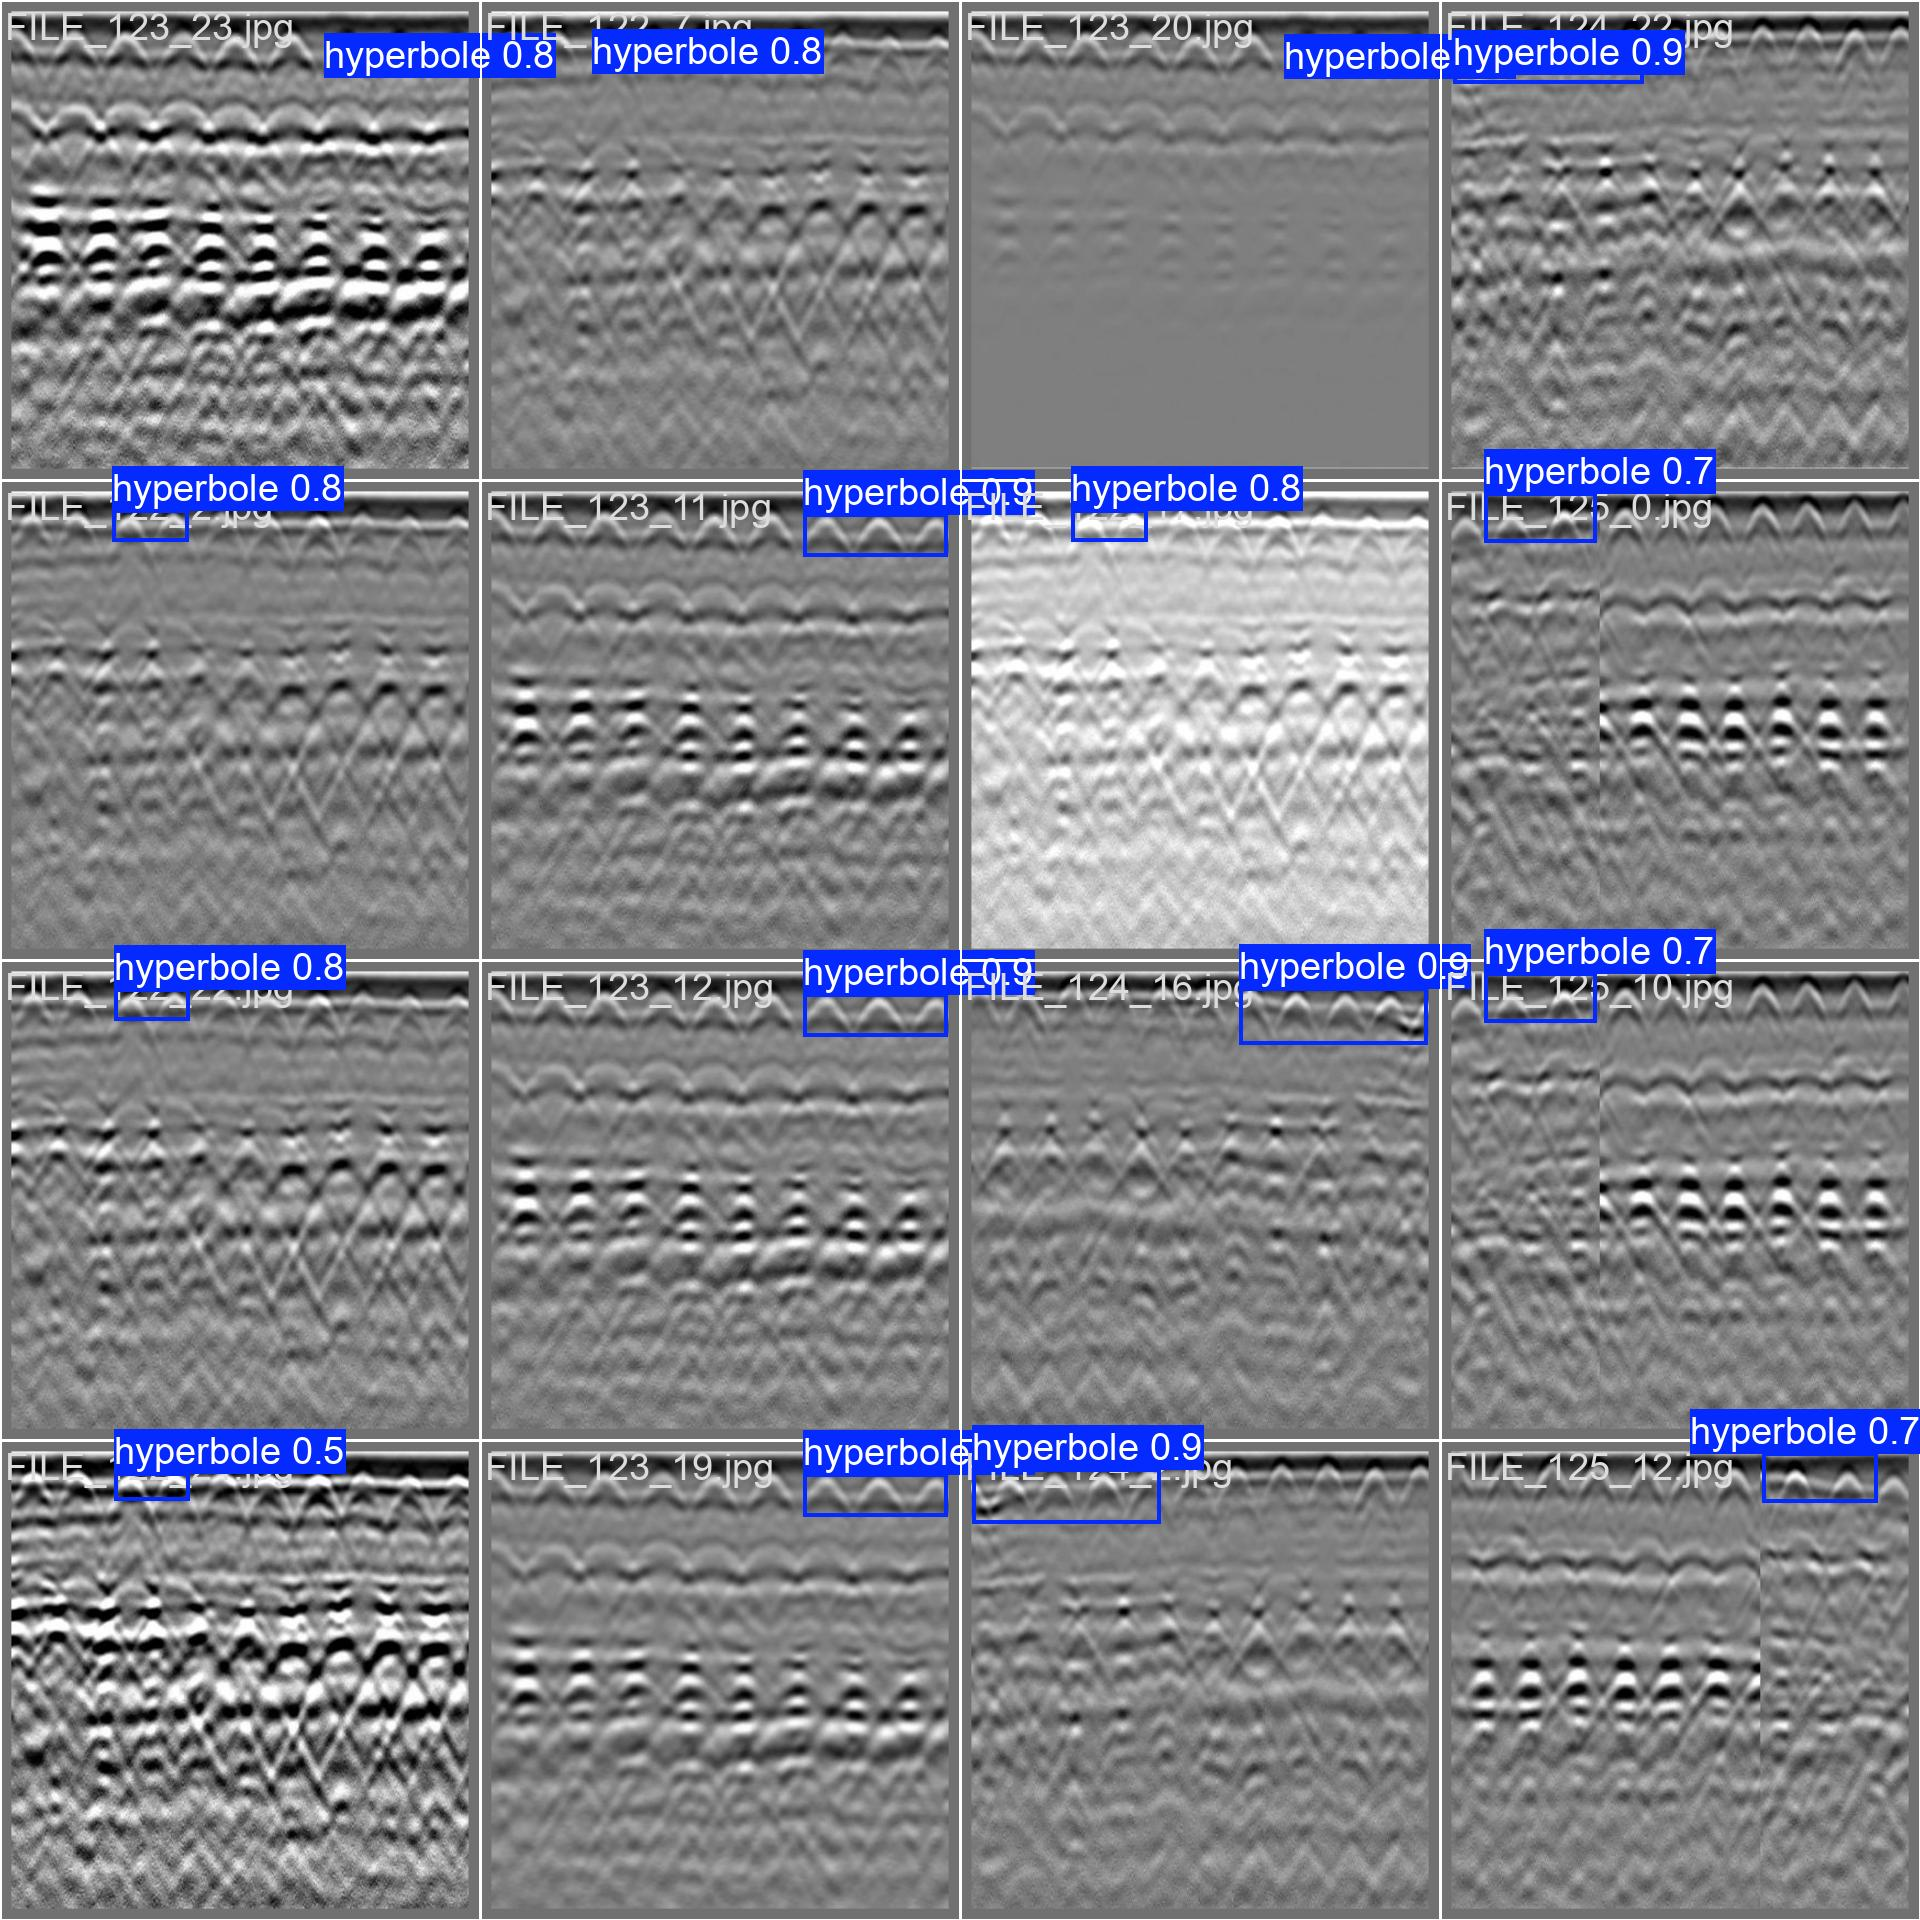

In [ ]:
from IPython.display import Image, display

# Afficher un exemple de prédiction sur l'ensemble de validation
display(Image(filename=f'/content/runs/detect/gpr_hyperbole_model/val_batch0_pred.jpg'))